In [6]:
# Import libraries and read data
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDv'] = boston_dataset.target

#### Investigate Dataset

In [7]:
boston.shape

(506, 14)

In [8]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDv'],
      dtype='object')

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Handle Missing Data

In [10]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDv       0
dtype: int64

#### Exploratory Data Analysis

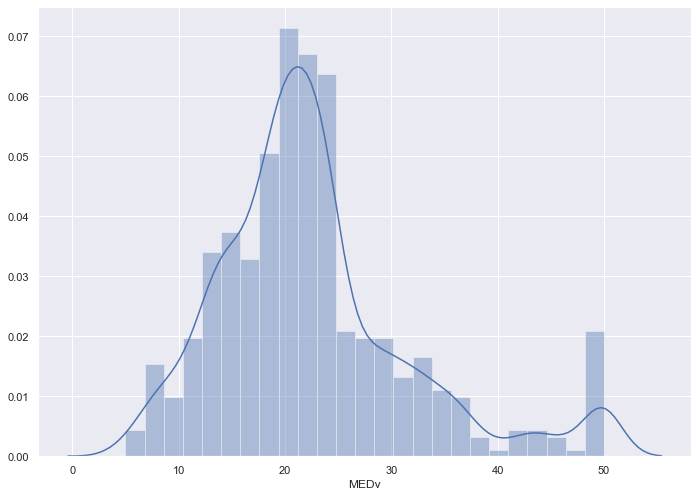

In [12]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(boston['MEDv'], bins=25)
plt.show()

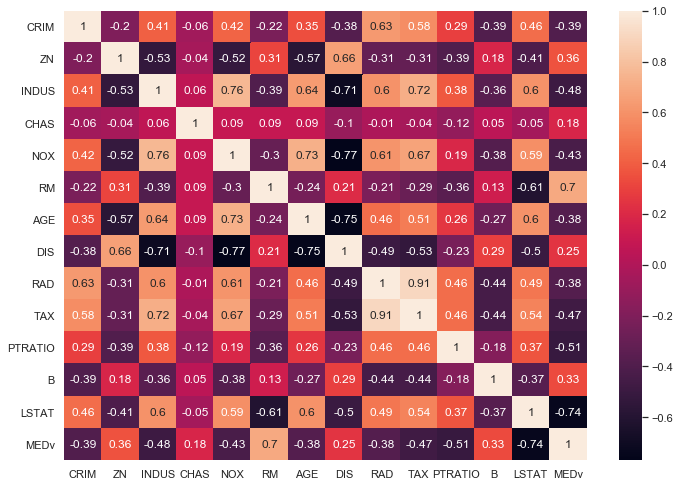

In [15]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
# sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis')
plt.show()

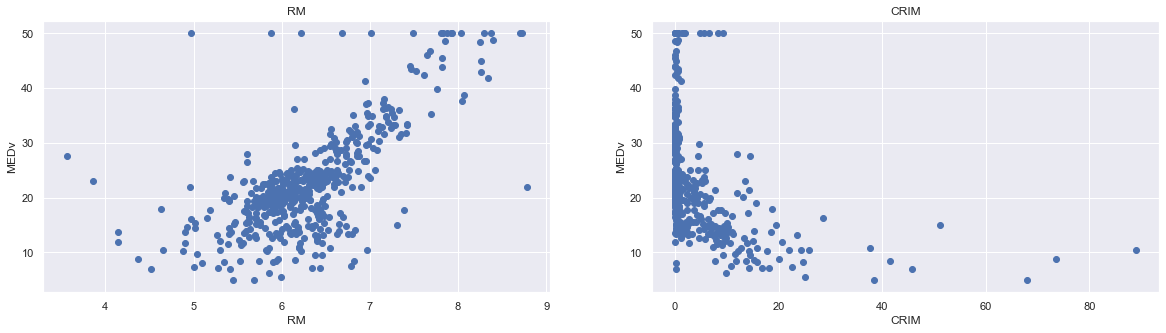

In [19]:
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM']
target = boston['MEDv']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDv')

In [21]:
## Log transformation to stretch values out to make the linear relationship strong ##

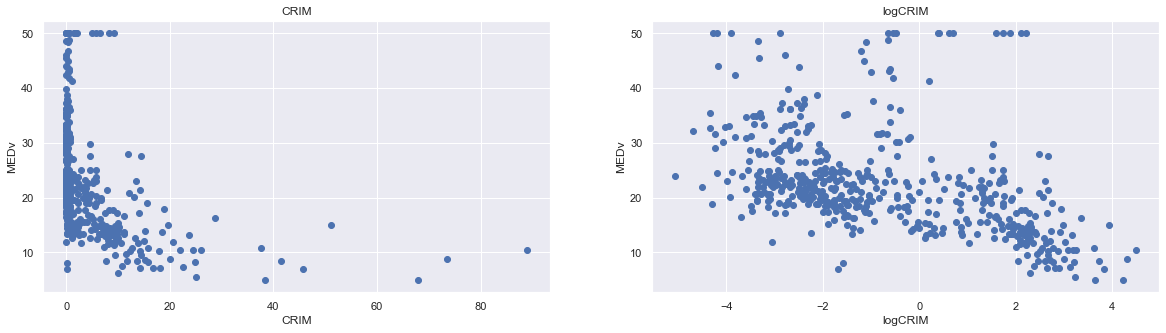

In [22]:
plt.figure(figsize=(20, 5))

boston['logCRIM'] = np.log(boston['CRIM'])

features = ['CRIM', 'logCRIM']
target = boston['MEDv']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDv')